#### Polars - EDA

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pl.read_excel('MuertesViolentas2023.xlsx')
data.head(3)

FileNotFoundError: no workbook found at path 'MuertesViolentas2023.xlsx'

In [ ]:
data.glimpse()

Rows: 2320
Columns: 40
$ Tipo Muert.                    <str> 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO', 'ASESINATO'
$ Zona                           <str> 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8', 'ZONA 8'
$ Subzona                        <str> 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL', 'D.M. GUAYAQUIL'
$ Distrito                       <str> 'NUEVA PROSPERINA', 'NUEVA PROSPERINA', 'PORTETE', 'ESTEROS', 'NUEVA PROSPERINA', 'SUR', 'SUR', 'SUR', 'SUR', 'FLORIDA'
$ Circuito                       <str> 'NUEVA PROSPERINA', 'NUEVA PROSPERINA', 'CISNE', 'TRINITARIA SUR', 'MONTE SINAI', 'UNION DE BANANEROS', 'GUASMO', 'FLORESTA', 'GUASMO', 'JUAN MONTALVO'
$ Cod. Subcircu                  <str> '09D08C01S03', '09D08C01S03', '09D04C01S02', '09D02C05S03', '09D

In [ ]:
data.collect_schema()

Schema([('Tipo Muert.', String),
        ('Zona', String),
        ('Subzona', String),
        ('Distrito', String),
        ('Circuito', String),
        ('Cod. Subcircu', String),
        ('Subcircuito', String),
        ('Provincia', String),
        ('código de provincia', Int64),
        ('Cantón', String),
        ('código de cantón', Int64),
        ('Coord. Y', Float64),
        ('Coord. X', Float64),
        ('Coord. Y Rev', Float64),
        ('Coord. X Rev', Float64),
        ('Area del Hecho', String),
        ('Lugar', String),
        ('Tipo Lugar', String),
        ('Fecha Infracción', Date),
        ('Hora Infracción', Datetime(time_unit='ms', time_zone=None)),
        ('Arma', String),
        ('Tipo Arma', String),
        ('Presun. Motiva.', String),
        ('Presun. Motiva. Obser', String),
        ('Probable Causa M.', String),
        ('Edad', Int64),
        ('Med. Edad', String),
        ('Sexo', String),
        ('Género', String),
        ('Etnia', String),
 

In [ ]:
# display(data.describe())

In [ ]:
df_subset = data.select([
    pl.col("Edad"),
    pl.col("Provincia"),
    pl.col("Probable Causa M.")
])

df_subset

Edad,Provincia,Probable Causa M.
i64,str,str
43,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
3,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
18,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
24,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
33,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
…,…,…
30,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
18,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""
25,"""GUAYAS""","""HERIDA POR ARMA DE FUEGO"""


## **EDA - Muertes Violentas 2023**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import openpyxl

from fancyimpute import KNN, IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_excel('MuertesViolentas2023.xlsx')
data.head(3)

,Tipo Muert.,Zona,Subzona,Distrito,Circuito,Cod. Subcircu,Subcircuito,Provincia,código de provincia,Cantón,...,Estado Civil,Nacionalidad,Discapacidad,Prof Reg Civ,Instrucción,Antecedentes,Anio_i,Mes_i,Hora,Rango Edad
0,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,NUEVA PROSPERINA,09D08C01S03,NUEVA PROSPERINA 3,GUAYAS,9,GUAYAQUIL,...,SOLTERO,ECUADOR,NINGUNA,JORNALERO,SIN_DATO,SI,2023,enero,0,42-46
1,ASESINATO,ZONA 8,D.M. GUAYAQUIL,NUEVA PROSPERINA,NUEVA PROSPERINA,09D08C01S03,NUEVA PROSPERINA 3,GUAYAS,9,GUAYAQUIL,...,SOLTERO,ECUADOR,NINGUNA,NINGUNA,SIN_DATO,NO,2023,enero,0,1-5
2,ASESINATO,ZONA 8,D.M. GUAYAQUIL,PORTETE,CISNE,09D04C01S02,CISNE 2,GUAYAS,9,GUAYAQUIL,...,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO,2023,enero,6,14-18


In [ ]:
# Verificamos la información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tipo Muert.            2320 non-null   object        
 1   Zona                   2320 non-null   object        
 2   Subzona                2320 non-null   object        
 3   Distrito               2320 non-null   object        
 4   Circuito               2320 non-null   object        
 5   Cod. Subcircu          2320 non-null   object        
 6   Subcircuito            2320 non-null   object        
 7   Provincia              2320 non-null   object        
 8   código de provincia    2320 non-null   int64         
 9   Cantón                 2320 non-null   object        
 10  código de cantón       2320 non-null   int64         
 11  Coord. Y               2320 non-null   float64       
 12  Coord. X               2320 non-null   float64       
 13  Coo

In [ ]:
# Verificamos la distribución de las variables numéricas
display(data.describe().T)

,count,mean,min,25%,50%,75%,max,std
código de provincia,2320.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0
código de cantón,2320.0,901.0,901.0,901.0,901.0,901.0,901.0,0.0
Coord. Y,2320.0,-2.190297,-3.00969,-2.242317,-2.19169,-2.105405,-1.9799,0.127922
Coord. X,2320.0,-79.9433,-80.40596,-79.96023,-79.92896,-79.902223,-79.73388,0.075219
Coord. Y Rev,2320.0,-2.190333,-3.00969,-2.242472,-2.19174,-2.105405,-1.9799,0.127929
Coord. X Rev,2320.0,-79.943355,-80.40596,-79.960295,-79.92896,-79.902223,-79.73388,0.075274
Fecha Infracción,2320,2023-06-29 08:58:08.275862272,2023-01-01 00:00:00,2023-04-02 18:00:00,2023-06-24 00:00:00,2023-09-23 00:00:00,2023-12-31 00:00:00,NaN
Edad,2320.0,29.181897,-1.0,22.0,29.0,36.0,85.0,13.075613
Anio_i,2320.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,0.0
Hora,2320.0,14.343534,0.0,10.0,16.0,20.0,23.0,7.120754


In [ ]:

# Verificamos la distribución de las variables categóricas
display(data.describe(include='all').T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Tipo Muert.,2320,4,ASESINATO,2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zona,2320,1,ZONA 8,2320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subzona,2320,1,D.M. GUAYAQUIL,2320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distrito,2320,10,NUEVA PROSPERINA,566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Circuito,2320,57,GUASMO,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cod. Subcircu,2320,216,09D08C01S03,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subcircuito,2320,216,NUEVA PROSPERINA 3,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provincia,2320,1,GUAYAS,2320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
código de provincia,2320.0,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,0.0
Cantón,2320,1,GUAYAQUIL,2320,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identificar columnas numéricas y categóricas
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

print("Columnas numéricas:", numeric_cols)
print("Columnas categóricas:", categorical_cols)

Columnas numéricas: ['código de provincia', 'código de cantón', 'Coord. Y', 'Coord. X', 'Coord. Y Rev', 'Coord. X Rev', 'Edad', 'Anio_i', 'Hora']
Columnas categóricas: ['Tipo Muert.', 'Zona', 'Subzona', 'Distrito', 'Circuito', 'Cod. Subcircu', 'Subcircuito', 'Provincia', 'Cantón', 'Area del Hecho', 'Lugar', 'Tipo Lugar', 'Fecha Infracción', 'Hora Infracción', 'Arma', 'Tipo Arma', 'Presun. Motiva.', 'Presun. Motiva. Obser', 'Probable Causa M.', 'Med. Edad', 'Sexo', 'Género', 'Etnia', 'Estado Civil', 'Nacionalidad', 'Discapacidad', 'Prof Reg Civ', 'Instrucción', 'Antecedentes', 'Mes_i', 'Rango Edad']


In [ ]:
# Verificar Fecha Infracción y Hora Infracción
print(f"Fecha Infracción: {data['Fecha Infracción'].dtype}")
print(f"Hora Infracción: {data['Hora Infracción'].dtype}") # Solo en la Hora

Fecha Infracción: datetime64[ns]
Hora Infracción: object


In [ ]:
min1 = data['Fecha Infracción'].min()
max1 = data['Fecha Infracción'].max()

Temporalidad = data['Fecha Infracción'].max() - data['Fecha Infracción'].min()
print(f"Temporalidad: {Temporalidad}")

min1, max1    

Temporalidad: 364 days 00:00:00


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

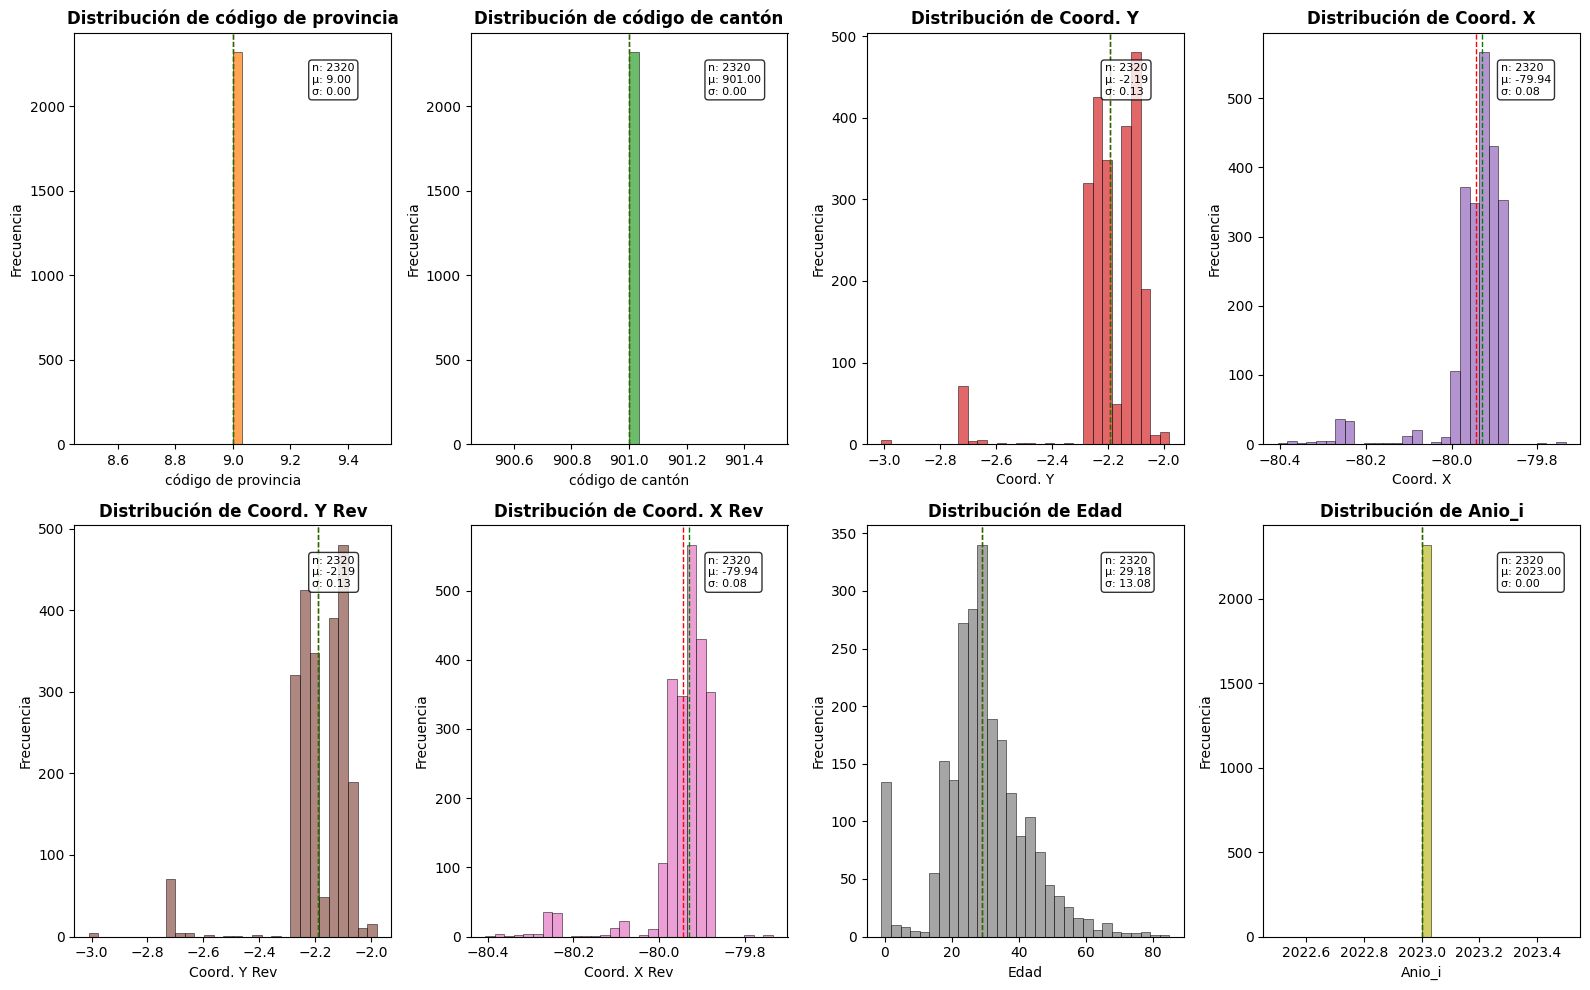

In [ ]:
# Configurar visualización
num_to_plot = min(len(numeric_cols), 8)
cols_to_plot = numeric_cols[:num_to_plot]

# Crear histogramas
plt.figure(figsize=(16, 10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, (num_to_plot+1)//2, i)
    
    # Datos limpios (excluir NaN)
    clean_data = data[col].dropna()
    
    # Histograma con mejoras visuales
    plt.hist(clean_data, bins=30, alpha=0.7, color=f'C{i}', edgecolor="black", linewidth=0.5)
    plt.title(f'Distribución de {col}', fontweight='bold', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)
    
    # Añadir líneas de referencia
    plt.axvline(clean_data.mean(), color='red', linestyle='--', linewidth=1, label='Media')
    plt.axvline(clean_data.median(), color='green', linestyle='--', linewidth=1, label='Mediana')
    
    # Estadísticas en el gráfico
    stats_text = f'n: {len(clean_data)}\nμ: {clean_data.mean():.2f}\nσ: {clean_data.std():.2f}'
    plt.text(0.75, 0.85, stats_text, transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             fontsize=8)

plt.tight_layout()
plt.show()

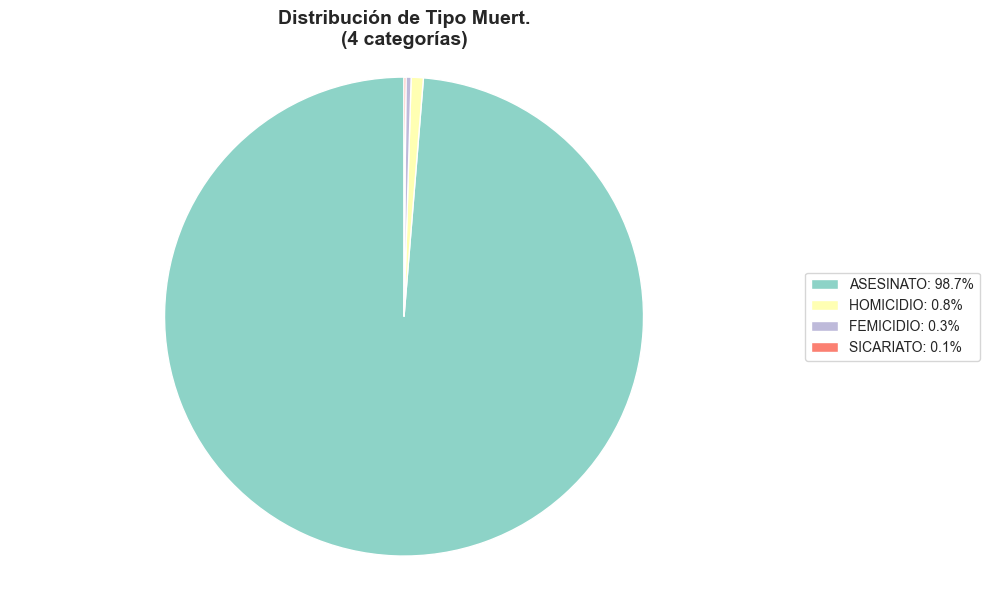

Gráfico generado para 'Tipo Muert.' (4 categorías)



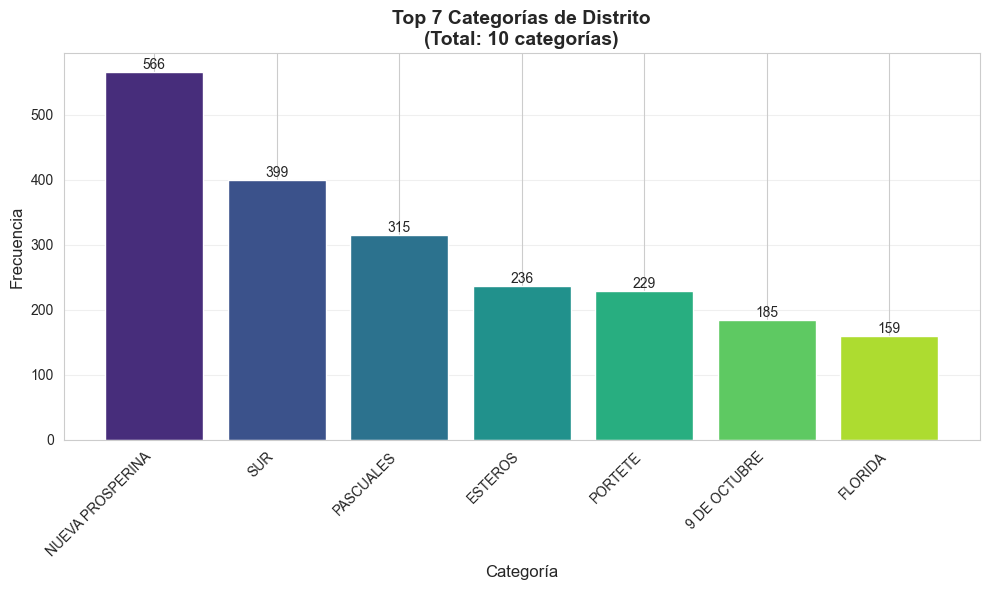

Gráfico generado para 'Distrito' (10 categorías)



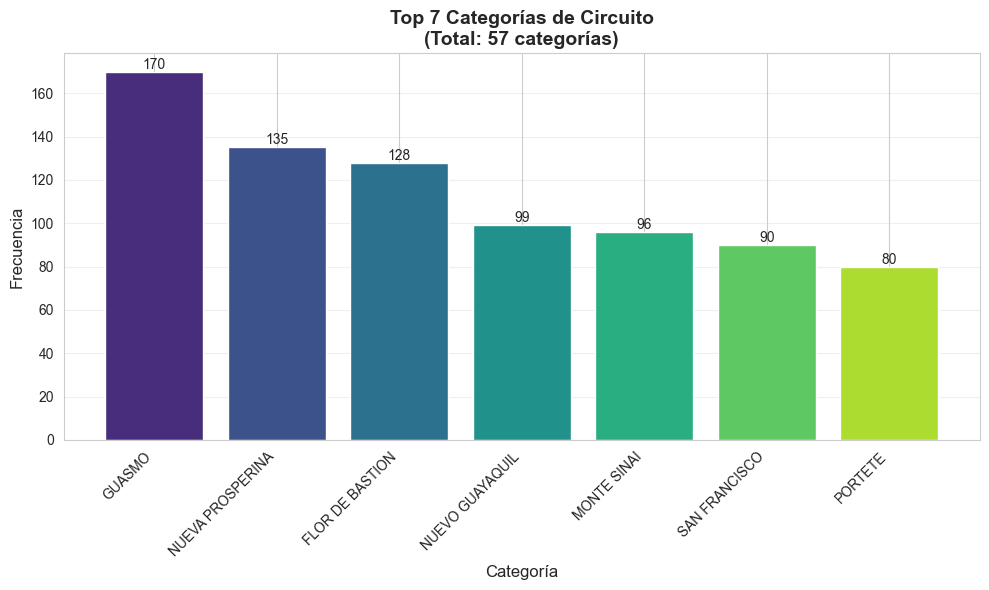

Gráfico generado para 'Circuito' (57 categorías)



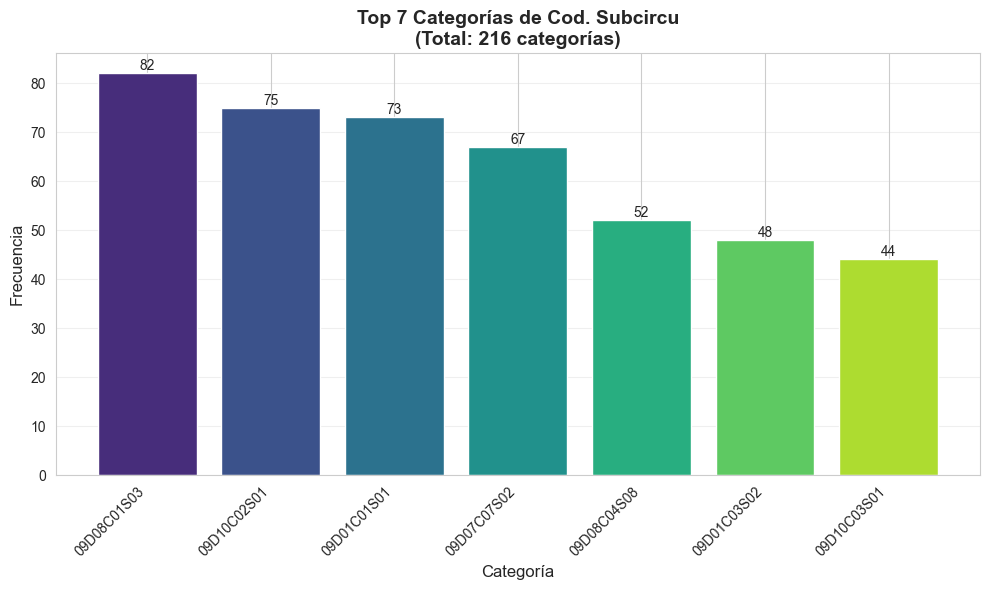

Gráfico generado para 'Cod. Subcircu' (216 categorías)



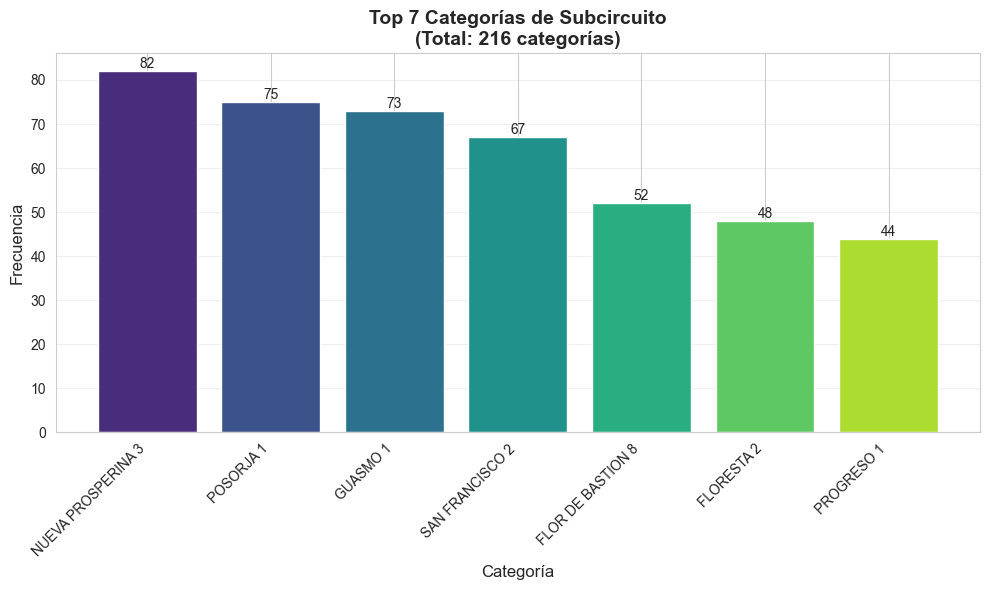

Gráfico generado para 'Subcircuito' (216 categorías)



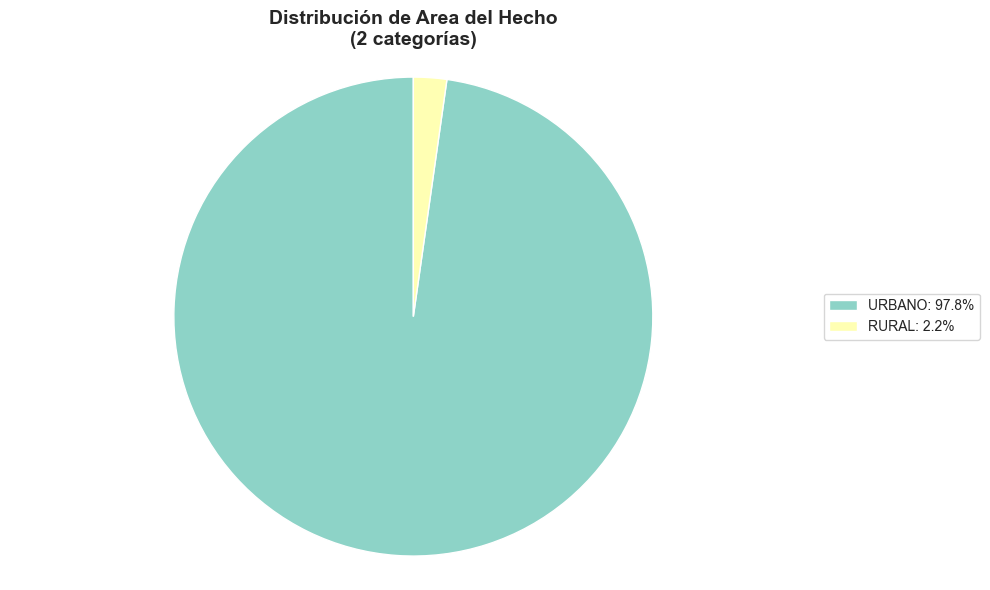

Gráfico generado para 'Area del Hecho' (2 categorías)



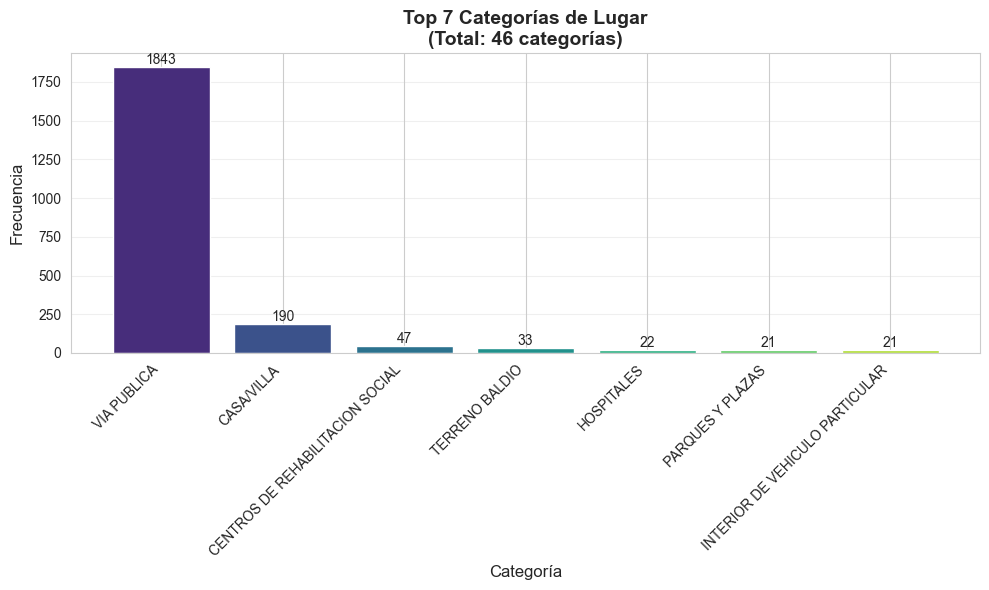

Gráfico generado para 'Lugar' (46 categorías)



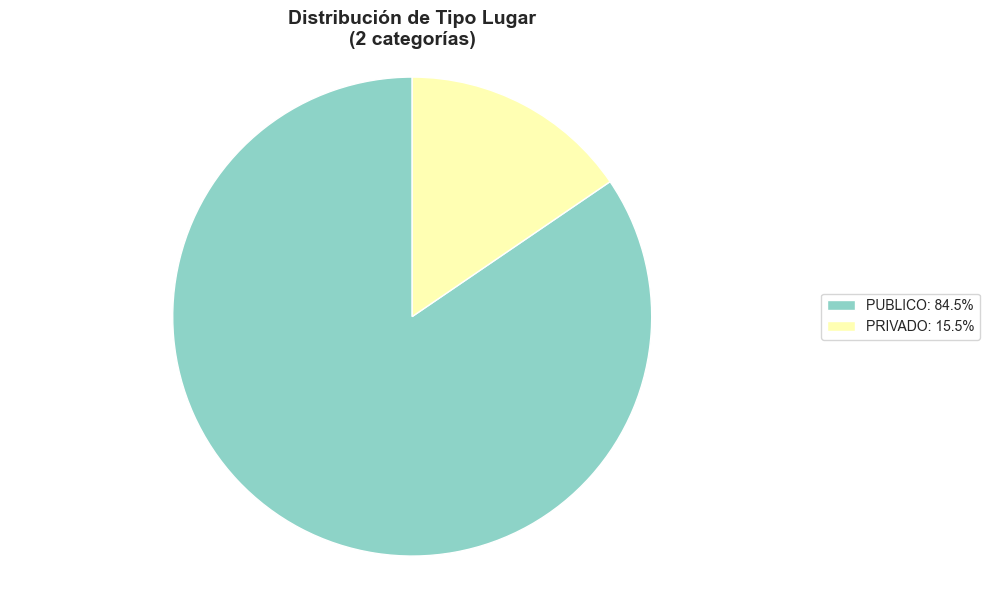

Gráfico generado para 'Tipo Lugar' (2 categorías)



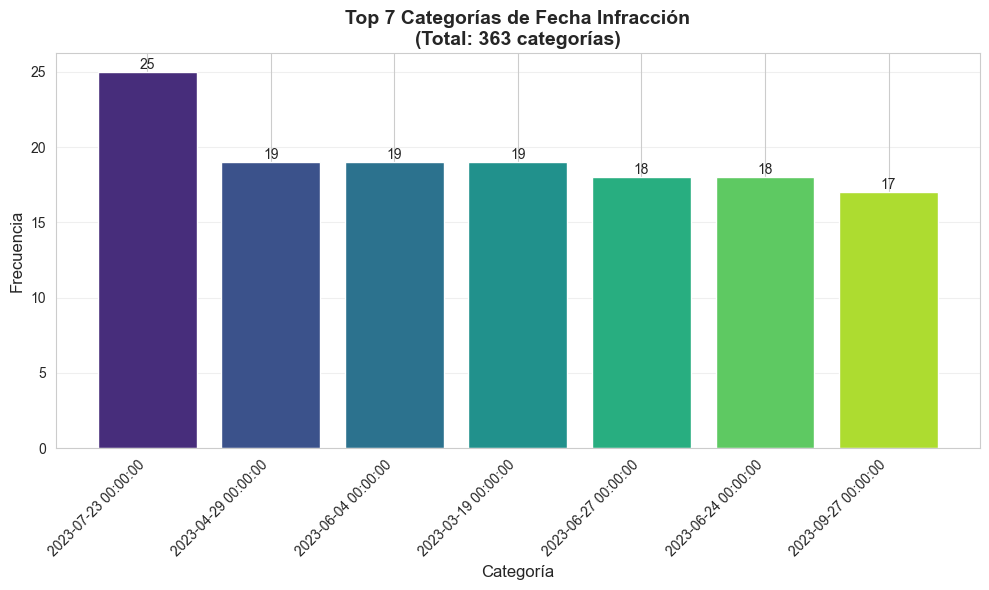

Gráfico generado para 'Fecha Infracción' (363 categorías)



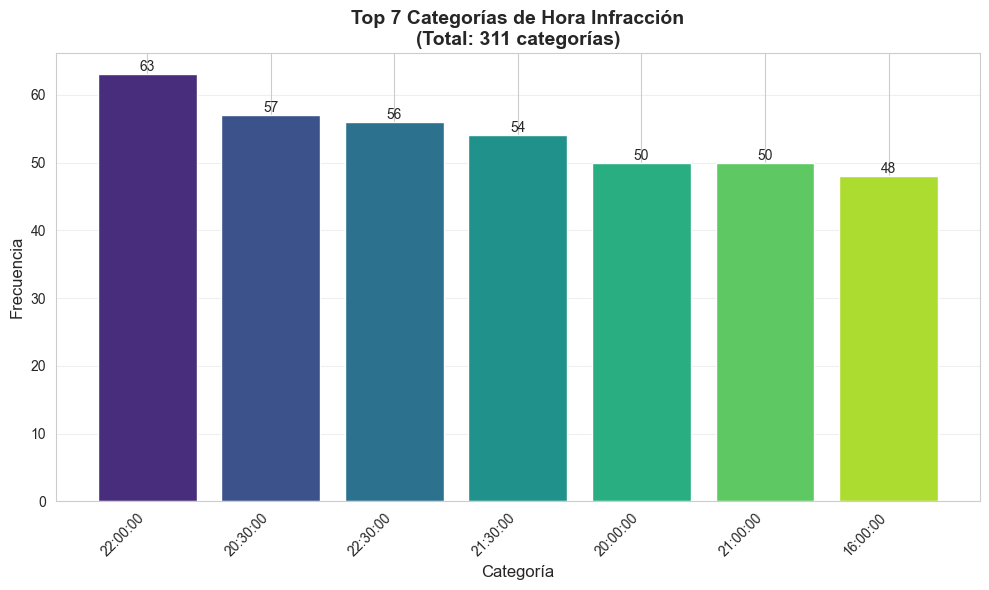

Gráfico generado para 'Hora Infracción' (311 categorías)



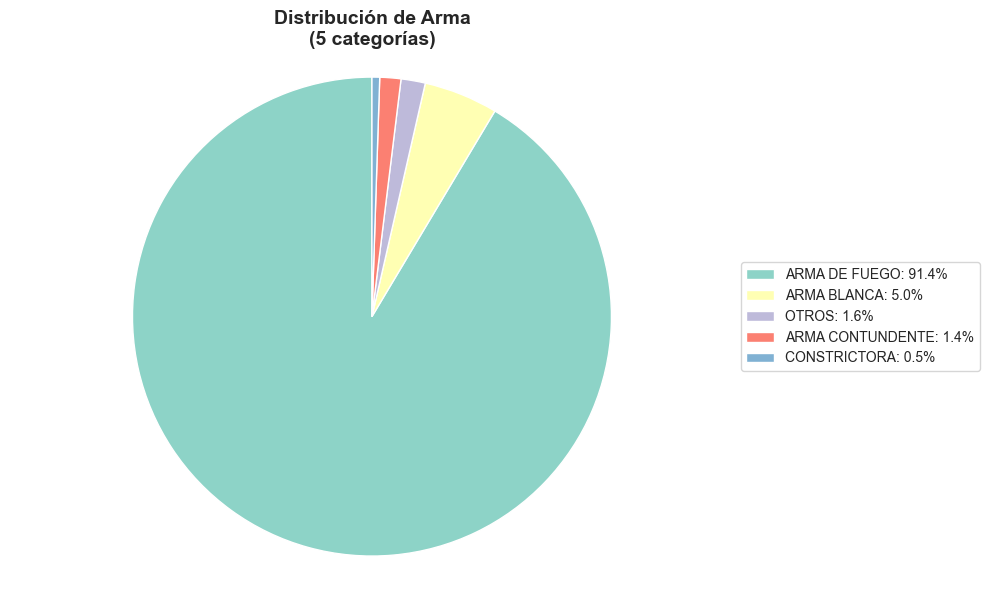

Gráfico generado para 'Arma' (5 categorías)



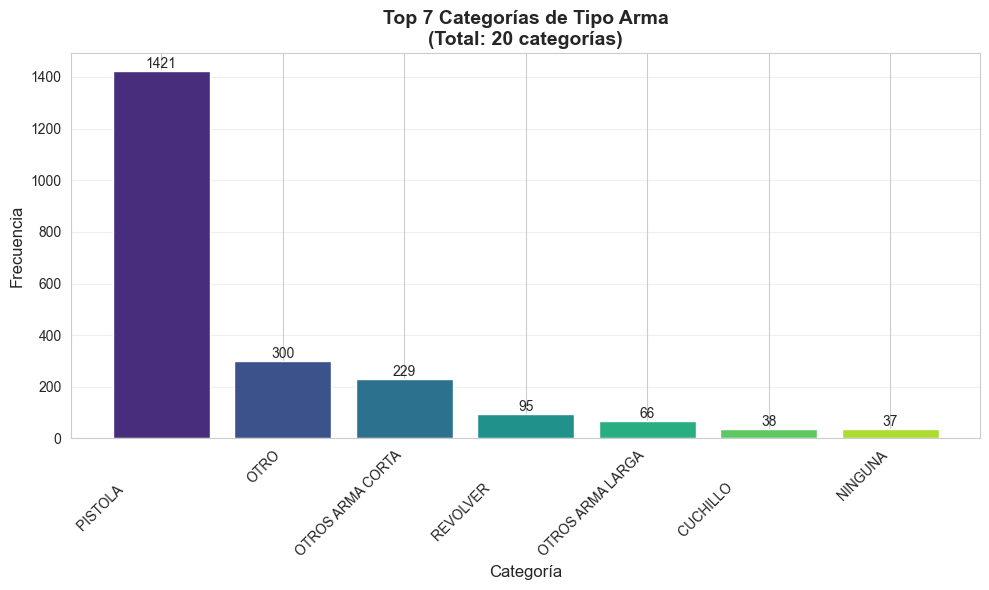

Gráfico generado para 'Tipo Arma' (20 categorías)



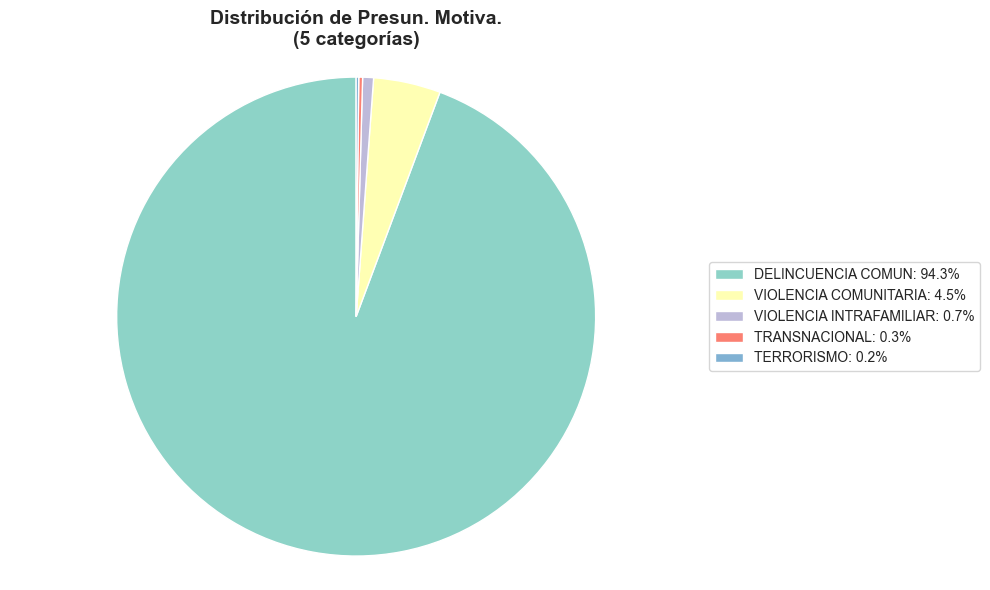

Gráfico generado para 'Presun. Motiva.' (5 categorías)



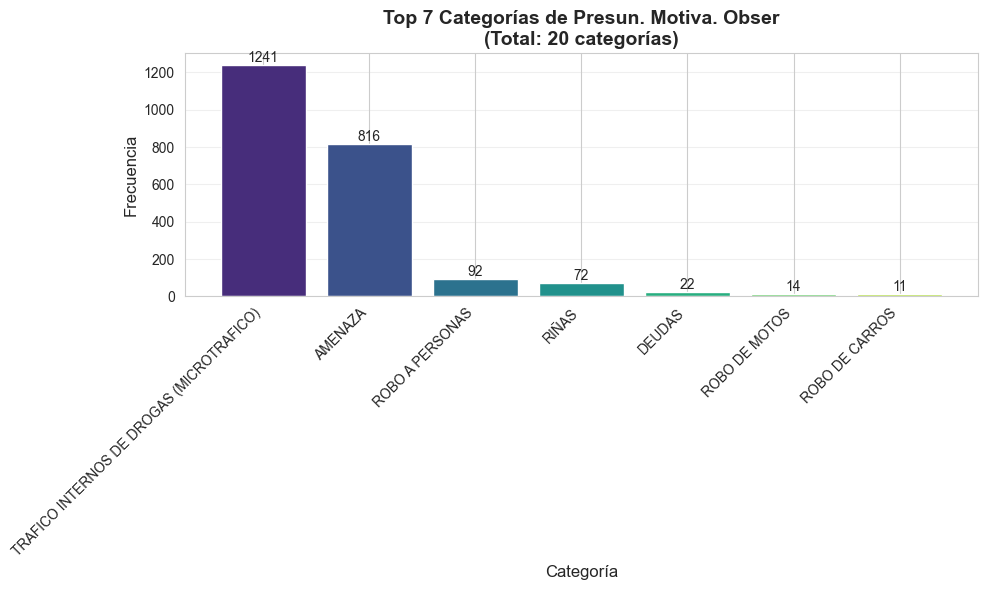

Gráfico generado para 'Presun. Motiva. Obser' (20 categorías)



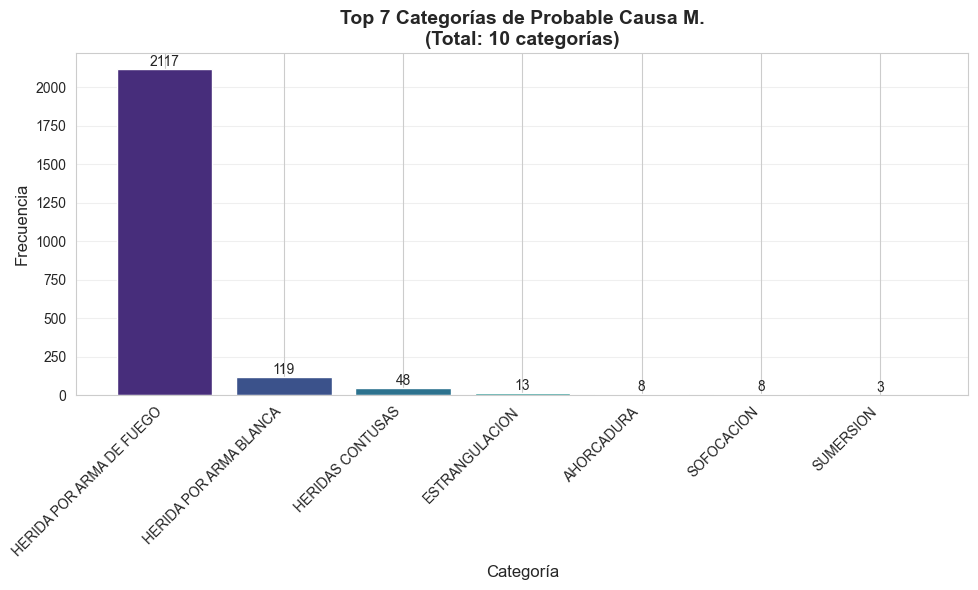

Gráfico generado para 'Probable Causa M.' (10 categorías)



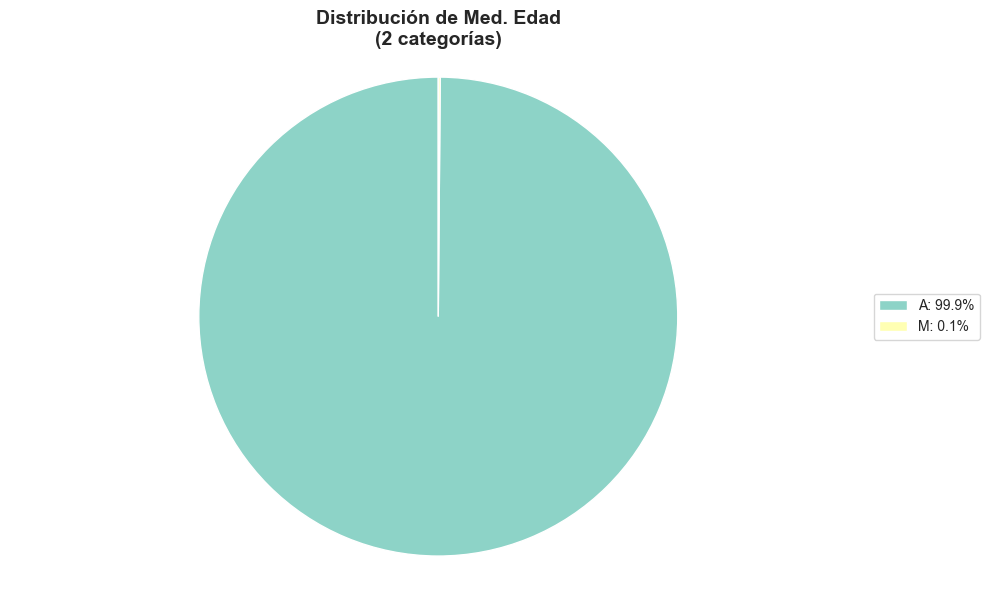

Gráfico generado para 'Med. Edad' (2 categorías)



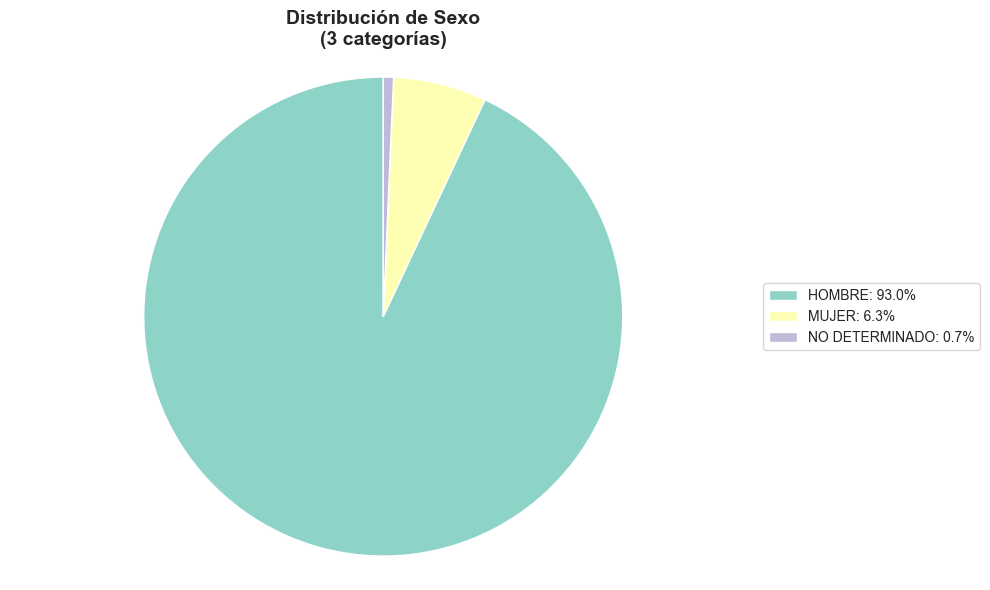

Gráfico generado para 'Sexo' (3 categorías)



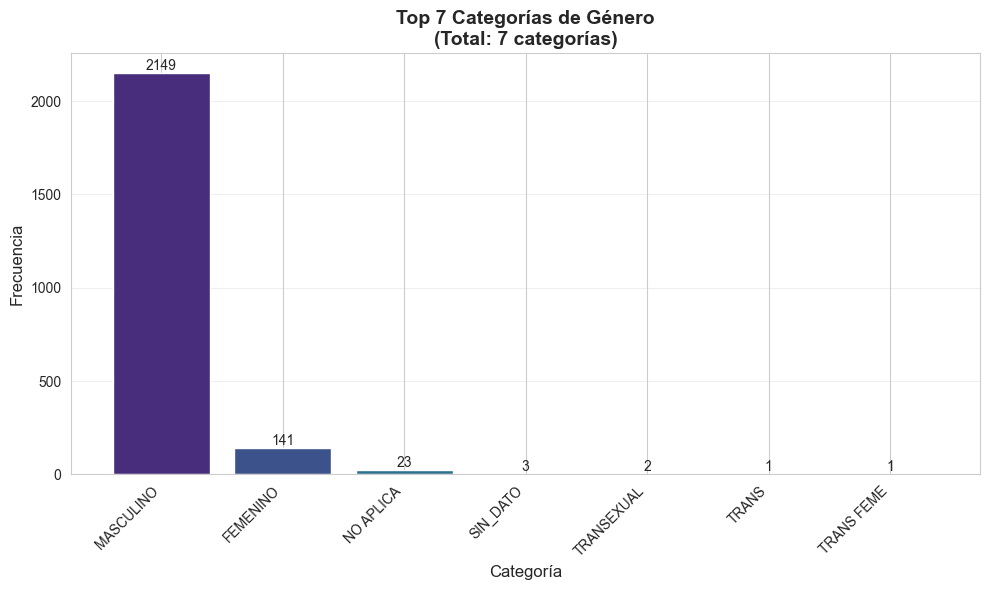

Gráfico generado para 'Género' (7 categorías)



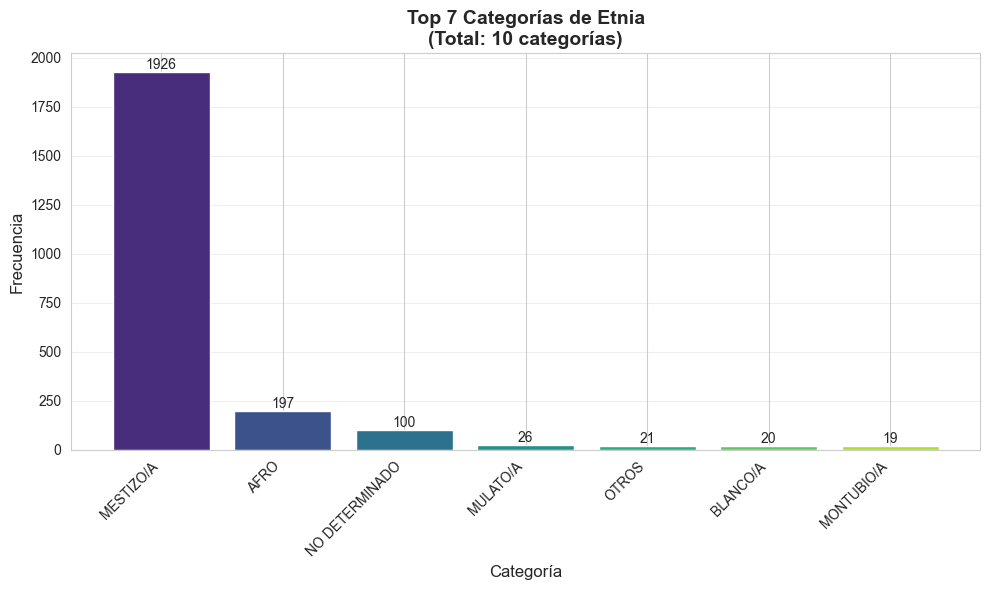

Gráfico generado para 'Etnia' (10 categorías)



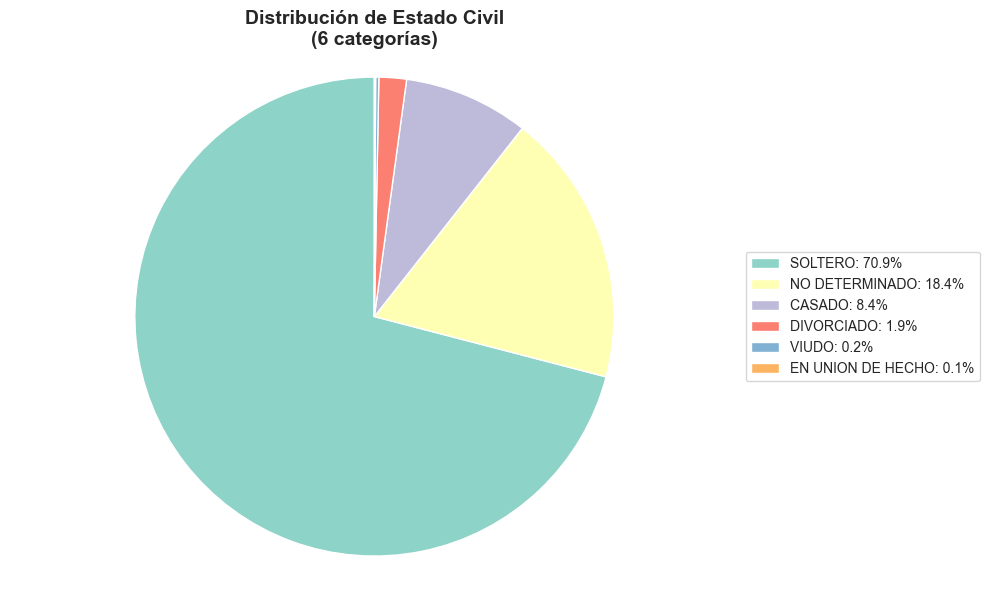

Gráfico generado para 'Estado Civil' (6 categorías)



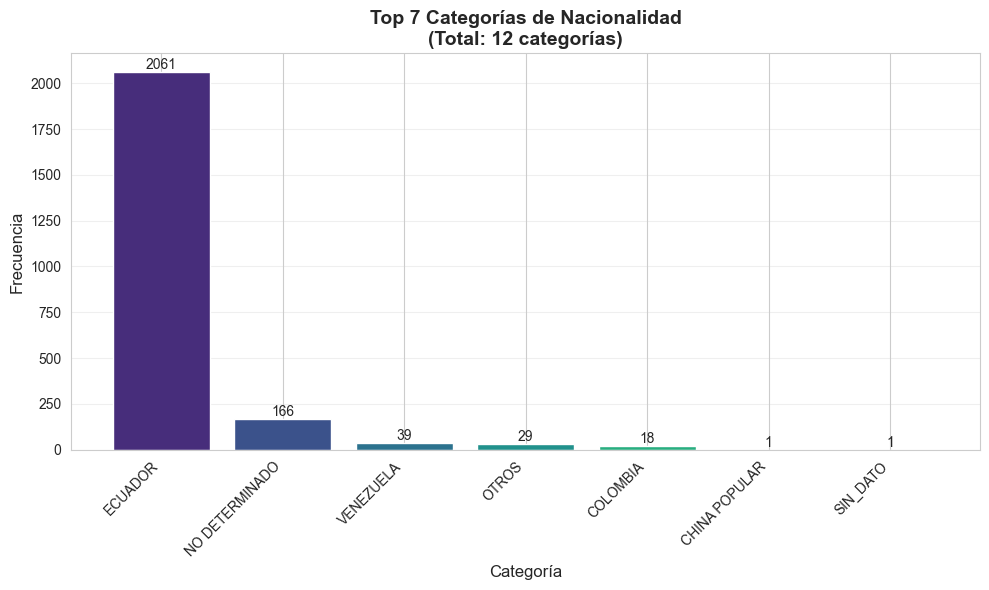

Gráfico generado para 'Nacionalidad' (12 categorías)



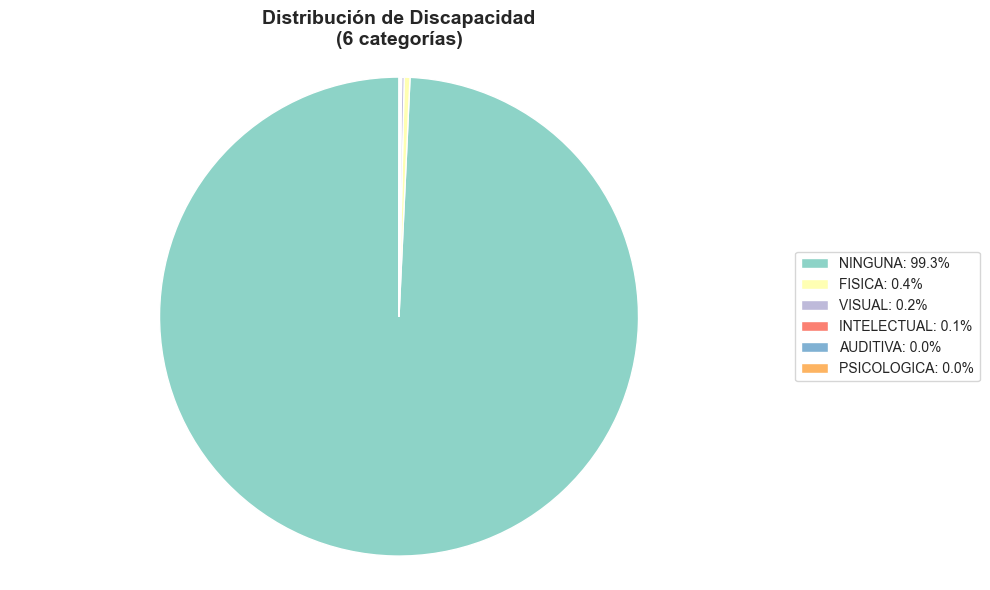

Gráfico generado para 'Discapacidad' (6 categorías)



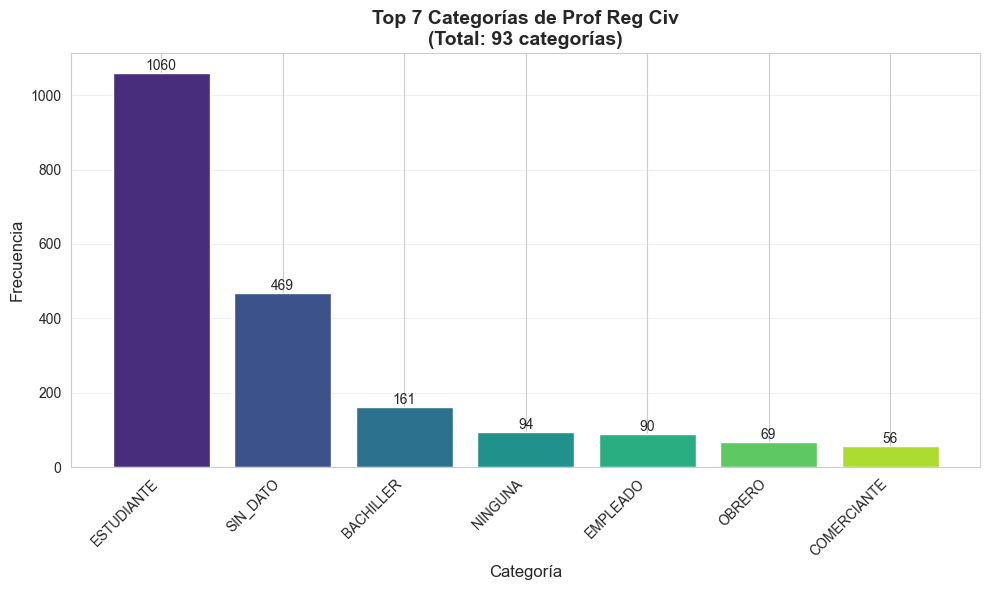

Gráfico generado para 'Prof Reg Civ' (93 categorías)



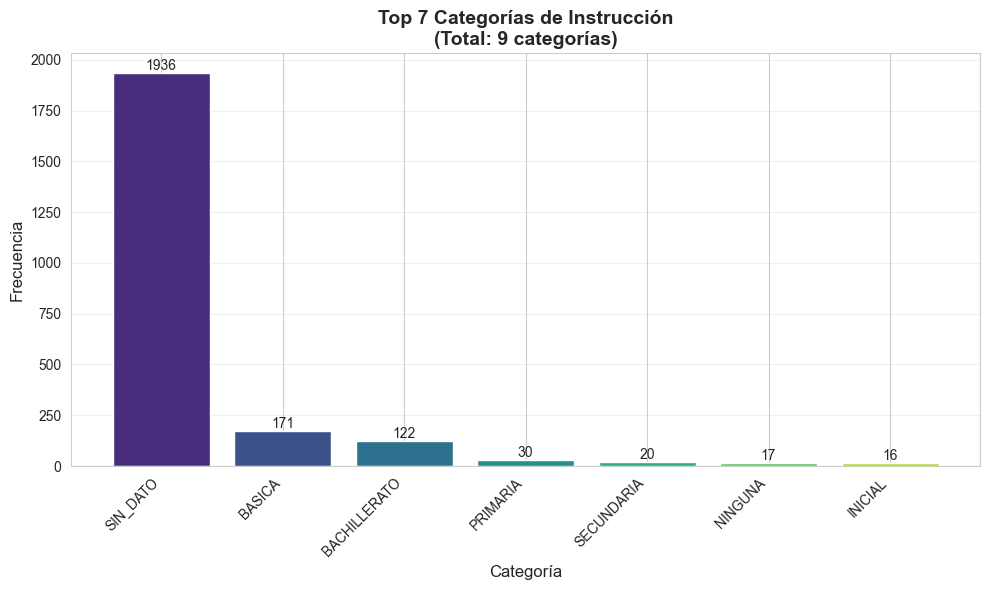

Gráfico generado para 'Instrucción' (9 categorías)



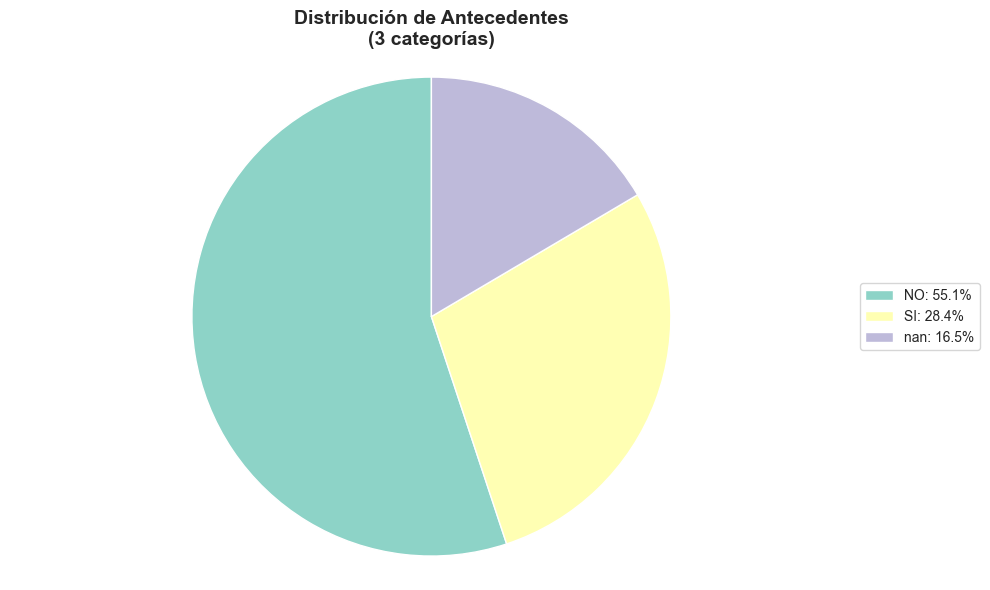

Gráfico generado para 'Antecedentes' (3 categorías)



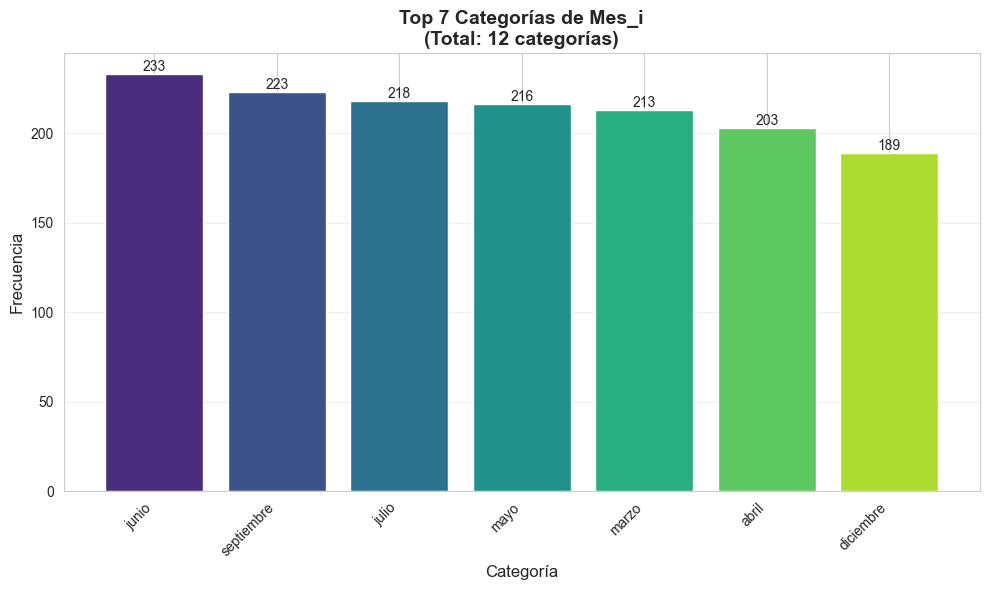

Gráfico generado para 'Mes_i' (12 categorías)



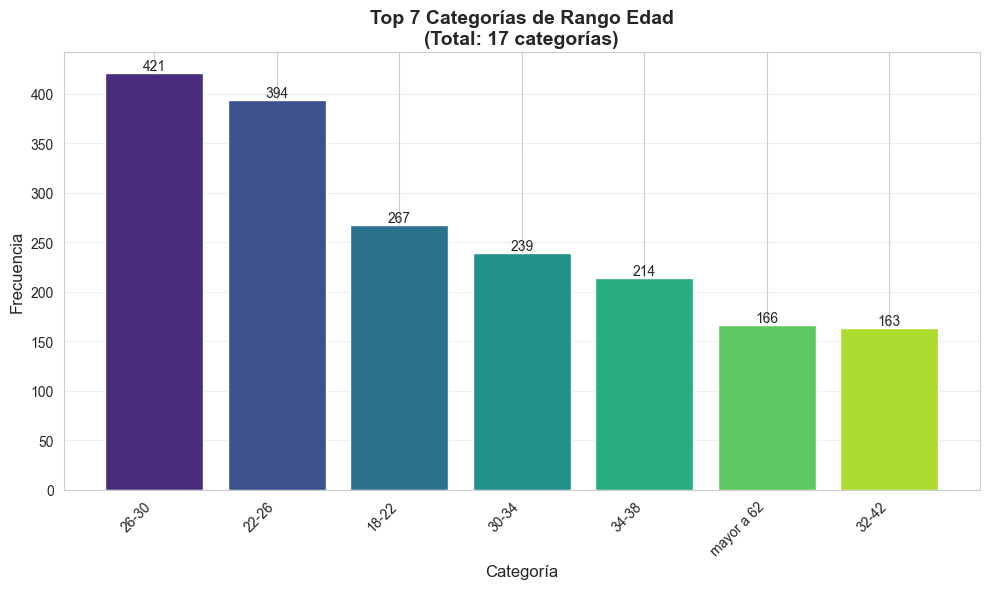

Gráfico generado para 'Rango Edad' (17 categorías)



In [ ]:
# Lista de columnas categóricas
columnas_categoricas = [
    'Tipo Muert.', 'Distrito', 'Circuito', 'Cod. Subcircu', 
    'Subcircuito', 'Area del Hecho', 'Lugar', 'Tipo Lugar', 
    'Fecha Infracción', 'Hora Infracción', 'Arma', 'Tipo Arma', 'Presun. Motiva.', 
    'Presun. Motiva. Obser', 'Probable Causa M.', 'Med. Edad', 'Sexo', 'Género', 
    'Etnia', 'Estado Civil', 'Nacionalidad', 'Discapacidad', 'Prof Reg Civ', 
    'Instrucción', 'Antecedentes', 'Mes_i', 'Rango Edad'
]

def graficar_categoricas(df, columnas):
    """
    Grafica variables categóricas según su número de categorías:
    - Menos de 7 categorías: gráfico de pastel (pie)
    - 7 o más categorías: gráfico de barras con top 7
    """
    
    # Configurar estilo
    sns.set_style("whitegrid")
    
    for columna in columnas:
        if columna not in data.columns:
            print(f"Advertencia: Columna '{columna}' no encontrada en el DataFrame")
            continue
        
        # Contar valores incluyendo NaN
        conteo = data[columna].value_counts(dropna=False)
        
        if len(conteo) == 0:
            print(f"Advertencia: Columna '{columna}' no tiene datos válidos")
            continue
        
        # Crear figura
        plt.figure(figsize=(10, 6))
        
        if len(conteo) < 7:
            # Gráfico de pastel para menos de 7 categorías
            colors = sns.color_palette("Set3", len(conteo))
            wedges, texts = plt.pie(conteo.values, labels=None, 
                    startangle=90, colors=colors)
            
            # Crear leyenda con porcentajes
            labels_with_pct = [f'{label}: {valor/conteo.sum()*100:.1f}%' 
                              for label, valor in zip(conteo.index, conteo.values)]
            plt.legend(wedges, labels_with_pct, loc="center left", 
                      bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
            
            plt.title(f'Distribución de {columna}\n({len(conteo)} categorías)', 
                     fontsize=14, fontweight='bold')
            plt.axis('equal')
        else:
            # Gráfico de barras para 7 o más categorías (Top 7)
            top7 = conteo.head(7)
            colors = sns.color_palette("viridis", 7)
            
            bars = plt.bar(range(len(top7)), top7.values, color=colors)
            plt.xticks(range(len(top7)), top7.index, rotation=45, ha='right')
            plt.xlabel('Categoría', fontsize=12)
            plt.ylabel('Frecuencia', fontsize=12)
            plt.title(f'Top 7 Categorías de {columna}\n(Total: {len(conteo)} categorías)', 
                     fontsize=14, fontweight='bold')
            
            # Añadir valores en las barras
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)
            
            plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        print(f"Gráfico generado para '{columna}' ({len(conteo)} categorías)\n")

re = graficar_categoricas(data, columnas_categoricas)


In [ ]:
# Porcentaje de valores faltantes por columna
missing_percent = data.isna().mean() * 100
missing_table = pd.DataFrame({
    "porcentaje_na": missing_percent
}).sort_values(by="porcentaje_na", ascending=False)

print("Porcentaje de valores faltantes por columna:")
display(missing_table)

Porcentaje de valores faltantes por columna:


,porcentaje_na
Antecedentes,16.508621
Prof Reg Civ,0.258621
Tipo Muert.,0.000000
Zona,0.000000
Circuito,0.000000
Cod. Subcircu,0.000000
Subzona,0.000000
Distrito,0.000000
Provincia,0.000000
Subcircuito,0.000000


In [ ]:
print(f"Antecedentes NAs: {data['Antecedentes'].isna().sum()}")
print(f"Antecedentes Value Counts:\n{data['Antecedentes'].value_counts()}")

Antecedentes NAs: 383
Antecedentes Value Counts:
Antecedentes
NO    1278
SI     659
Name: count, dtype: int64


In [ ]:
print(f"Prof Reg Civ NAs: {data['Prof Reg Civ'].isna().sum()}")
print(f"Prof Reg Civ Value Counts:\n{data['Prof Reg Civ'].value_counts()}")

Prof Reg Civ NAs: 6
Prof Reg Civ Value Counts:
Prof Reg Civ
ESTUDIANTE              1060
SIN_DATO                 469
BACHILLER                161
NINGUNA                   94
EMPLEADO                  90
                        ... 
ACTOR                      1
AUXILIAR. ENFERMERIA       1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 92, dtype: int64


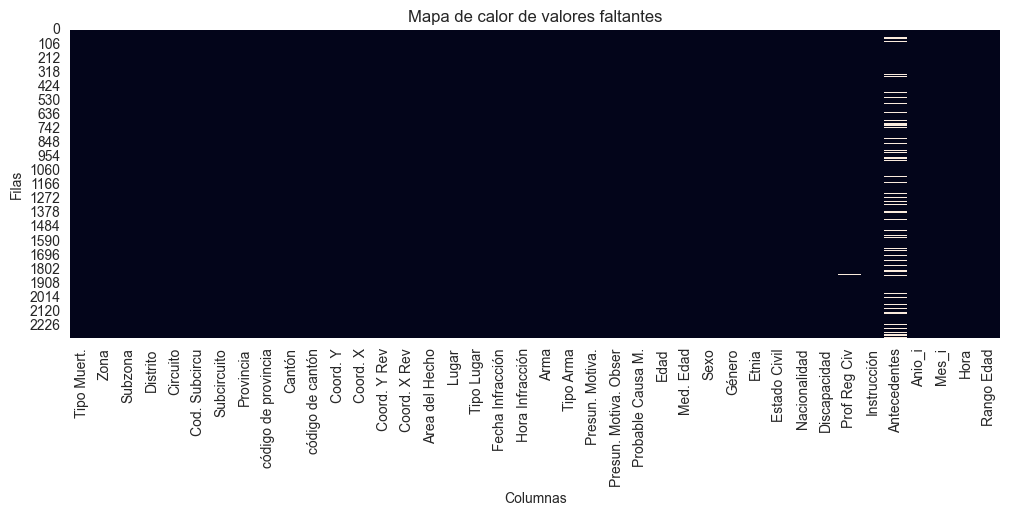

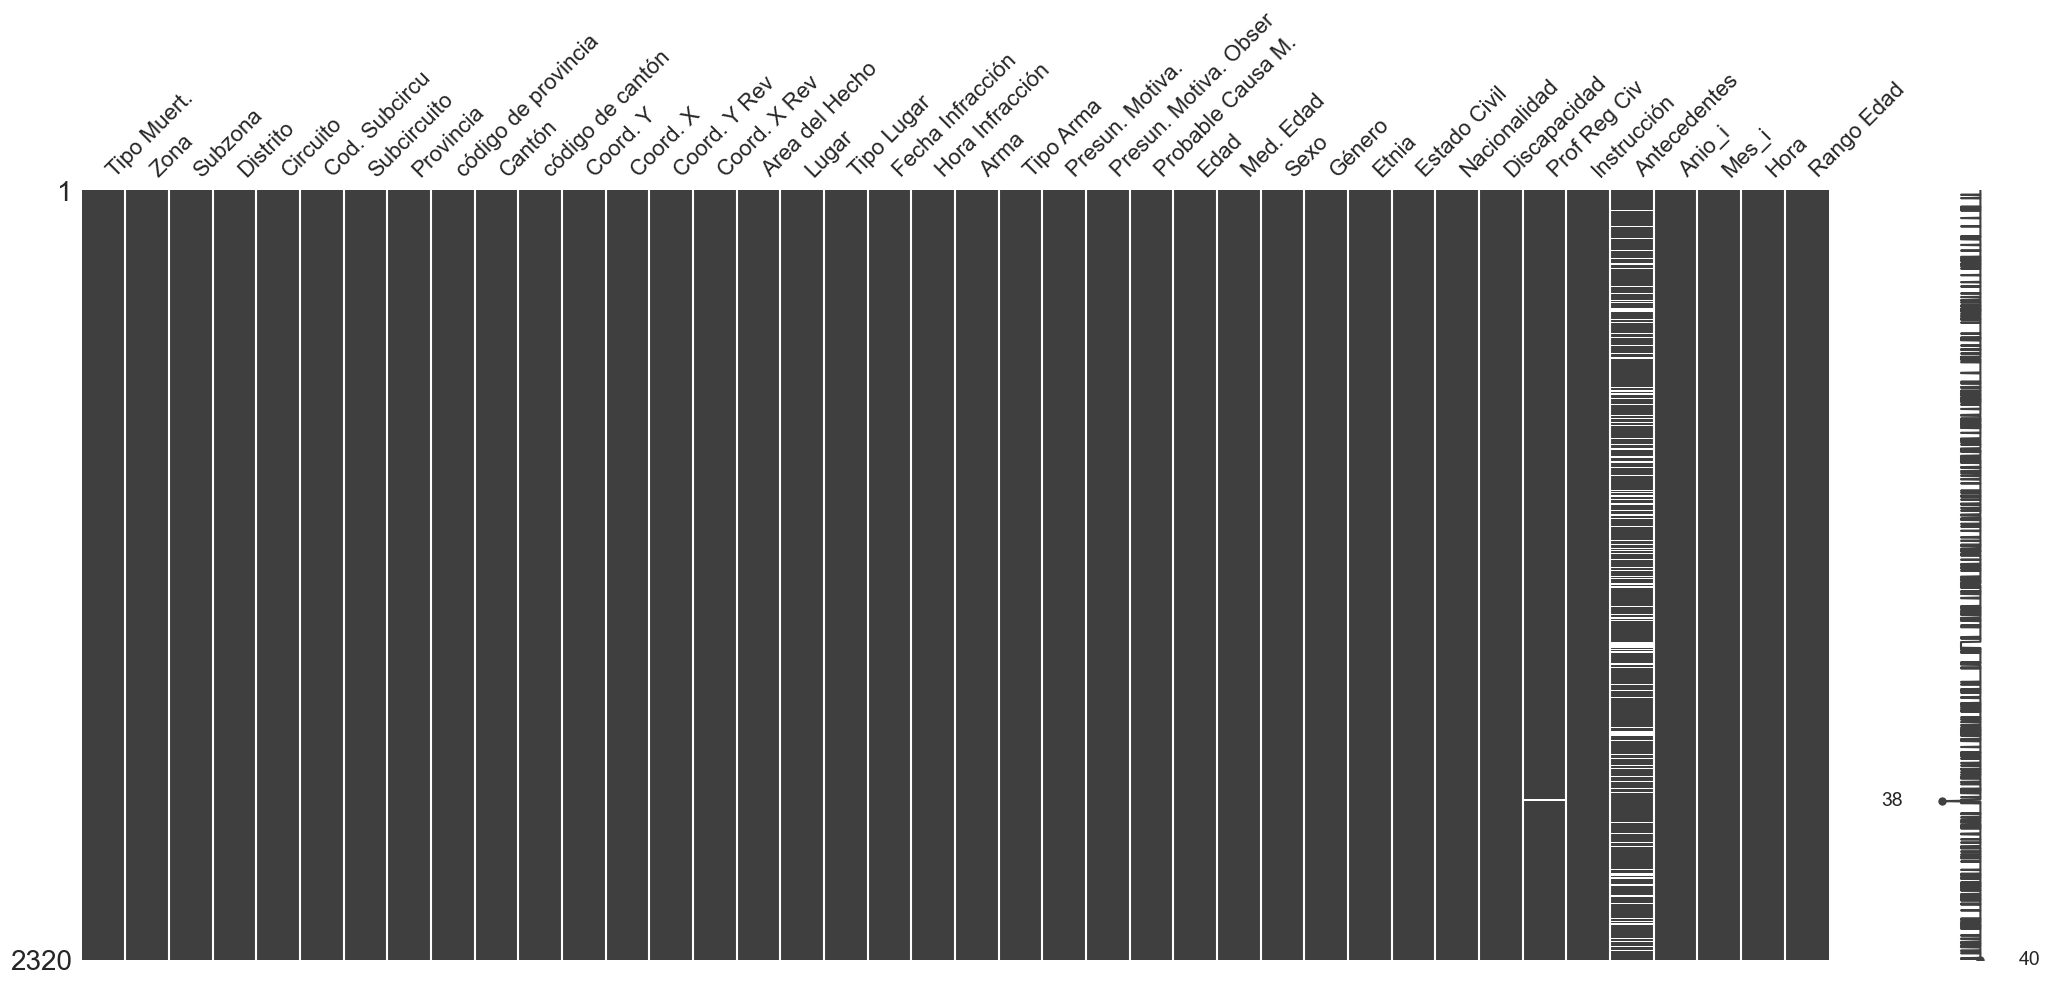

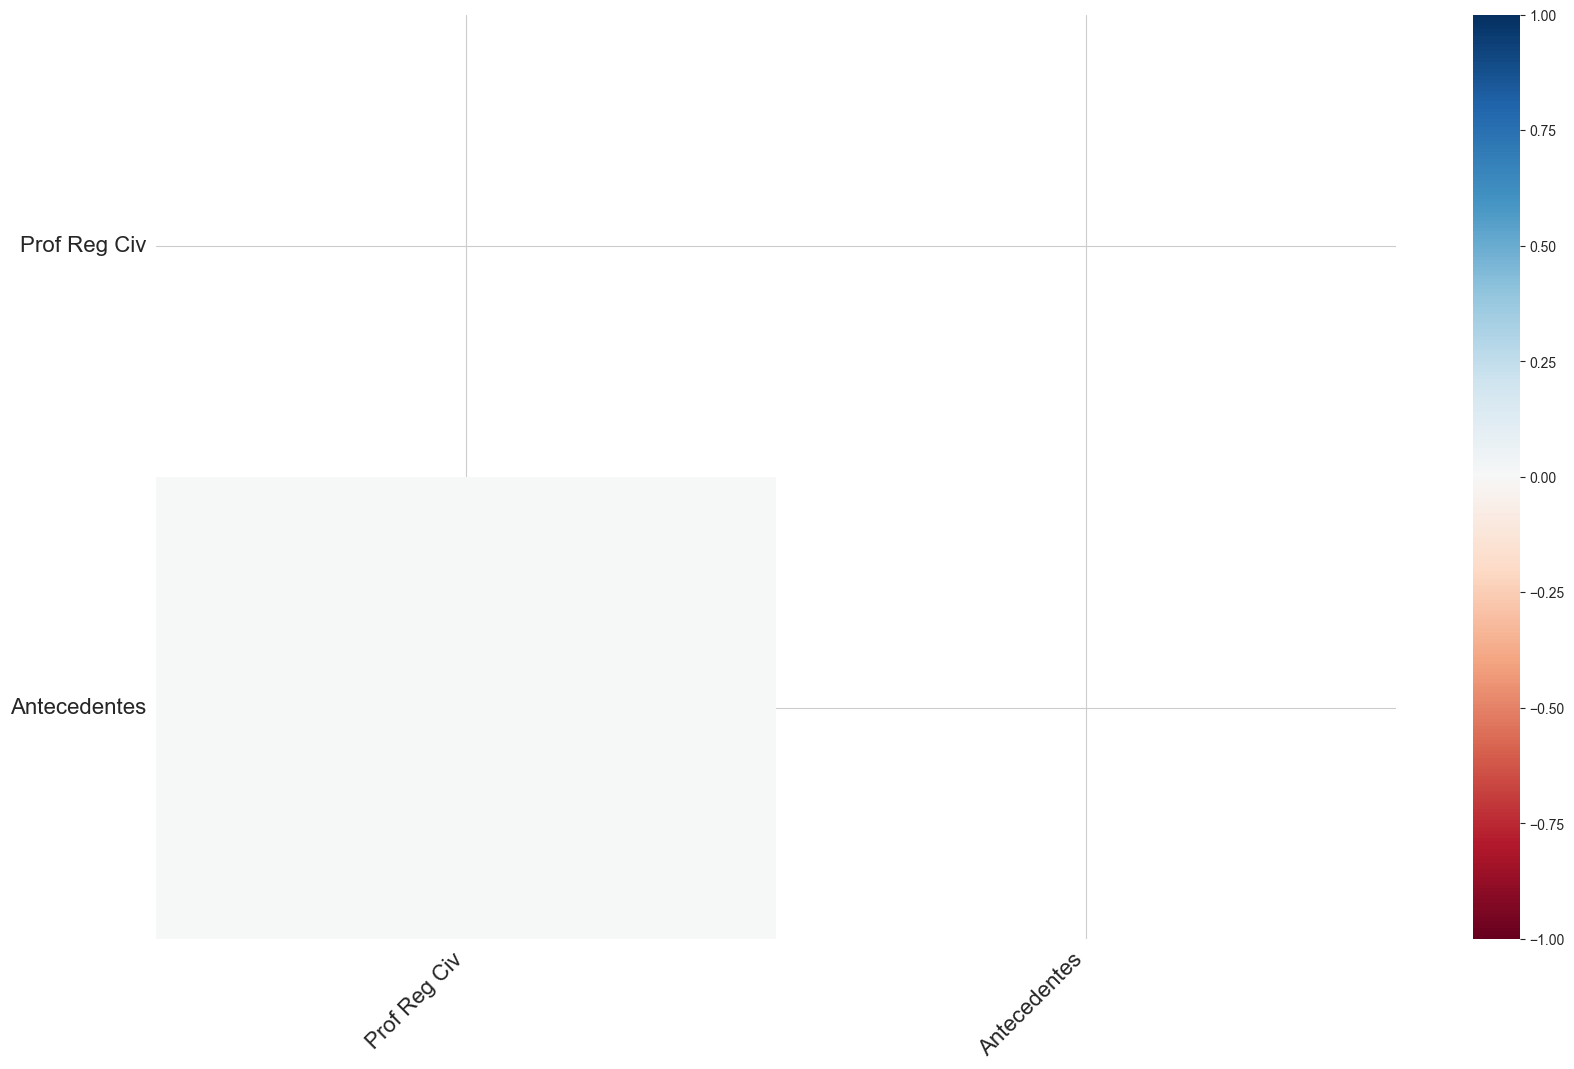

In [ ]:
plt.figure(figsize=(12, 4))
sns.heatmap(data.isna(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()

# Matrices de missingno
msno.matrix(data)
plt.show()

msno.heatmap(data) 
plt.show()

#### **Imputación de valores faltantes**

In [ ]:
# MÉTODO 1: IMPUTACIÓN ALEATORIA (Random Sampling)
df_random = data.copy()

# Para cada columna, imputa con valores aleatorios de los existentes
for col in ['Antecedentes', 'Prof Reg Civ']:
    # Obtener valores no nulos
    valores_validos = df_random[col].dropna()
    # Crear máscara de valores faltantes
    mask = df_random[col].isnull()
    # Imputar con valores aleatorios
    df_random.loc[mask, col] = np.random.choice(valores_validos, size=mask.sum())

print("\nDistribución después de imputación:")
print(df_random['Antecedentes'].value_counts())
print(df_random['Prof Reg Civ'].value_counts())


Distribución después de imputación:
Antecedentes
NO    1535
SI     785
Name: count, dtype: int64
Prof Reg Civ
ESTUDIANTE              1063
SIN_DATO                 471
BACHILLER                162
NINGUNA                   94
EMPLEADO                  90
                        ... 
ACTOR                      1
AUXILIAR. ENFERMERIA       1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 92, dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# MÉTODO 3: IMPUTACIÓN PREDICTIVA (KNN)

df_knn = data.copy()

# Codificar variables categóricas a numéricas
le_ant = LabelEncoder()
le_prof = LabelEncoder()

# Crear columnas temporales codificadas
df_knn['Antecedentes_encoded'] = df_knn['Antecedentes'].apply(
    lambda x: le_ant.fit_transform(df_knn['Antecedentes'].dropna())[
        list(df_knn['Antecedentes'].dropna()).index(x)
    ] if pd.notna(x) else np.nan
)
df_knn['Prof_Reg_Civ_encoded'] = df_knn['Prof Reg Civ'].apply(
    lambda x: le_prof.fit_transform(df_knn['Prof Reg Civ'].dropna())[
        list(df_knn['Prof Reg Civ'].dropna()).index(x)
    ] if pd.notna(x) else np.nan
)

# Imputar con KNN
imputer_knn = KNNImputer(n_neighbors=3)
cols_to_impute = ['Antecedentes_encoded', 'Prof_Reg_Civ_encoded', 'Edad', 'Hora']
df_knn[cols_to_impute] = imputer_knn.fit_transform(df_knn[cols_to_impute])

# Decodificar a categorías originales
le_ant_full = LabelEncoder().fit(data['Antecedentes'].dropna())
le_prof_full = LabelEncoder().fit(data['Prof Reg Civ'].dropna())

df_knn['Antecedentes'] = le_ant_full.inverse_transform(
    df_knn['Antecedentes_encoded'].round().astype(int)
)
df_knn['Prof Reg Civ'] = le_prof_full.inverse_transform(
    df_knn['Prof_Reg_Civ_encoded'].round().astype(int)
)

# Eliminar columnas temporales
df_knn = df_knn[['Antecedentes', 'Prof Reg Civ', 'Edad', 'Hora']]
print(df_knn)

     Antecedentes          Prof Reg Civ  Edad  Hora
0              SI             JORNALERO  43.0   0.0
1              NO               NINGUNA   3.0   0.0
2              NO            ESTUDIANTE  18.0   6.0
3              SI            ESTUDIANTE  24.0  23.0
4              NO              EMPLEADO  33.0   1.0
...           ...                   ...   ...   ...
2315           SI            ESTUDIANTE  30.0  13.0
2316           NO            ESTUDIANTE  18.0  15.0
2317           NO  BACHILL. EN CIENCIAS  25.0  15.0
2318           SI            ESTUDIANTE  26.0  22.0
2319           NO              SIN_DATO  -1.0  11.0

[2320 rows x 4 columns]


In [ ]:
print(df_knn['Antecedentes'].value_counts())
print(df_knn['Prof Reg Civ'].value_counts())

print(df_knn['Antecedentes'].isna().sum())
print(df_knn['Prof Reg Civ'].isna().sum())

Antecedentes
NO    1279
SI    1041
Name: count, dtype: int64
Prof Reg Civ
ESTUDIANTE              1060
SIN_DATO                 469
BACHILLER                161
NINGUNA                   94
EMPLEADO                  91
                        ... 
ACTOR                      1
AUXILIAR. ENFERMERIA       1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 92, dtype: int64
0
0


In [ ]:
# MÉTODO 3: IMPUTACIÓN PREDICTIVA (Random Forest)

df_ml = data.copy()

# Función para imputar con Random Forest
def impute_with_rf(data, target_col, feature_cols):
    df_temp = data.copy()
    
    # Separar datos con y sin valores faltantes
    train_data = df_temp[df_temp[target_col].notna()]
    predict_data = df_temp[df_temp[target_col].isna()]
    
    if len(predict_data) == 0:
        return df_temp
    
    # Preparar datos
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_predict = predict_data[feature_cols]
    
    # Entrenar modelo
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train_encoded)
    
    # Predecir valores faltantes
    predictions = rf.predict(X_predict)
    predictions_decoded = le.inverse_transform(predictions)
    
    # Asignar predicciones
    df_temp.loc[df_temp[target_col].isna(), target_col] = predictions_decoded
    
    return df_temp

# Imputar Antecedentes basado en otras características
if df_ml['Antecedentes'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Antecedentes', ['Edad', 'Hora'])

# Imputar Prof_Reg_Civ basado en otras características
if df_ml['Prof Reg Civ'].isnull().any():
    df_ml = impute_with_rf(df_ml, 'Prof Reg Civ', ['Edad', 'Hora'])

print(df_ml)

     Tipo Muert.    Zona         Subzona          Distrito  \
0      ASESINATO  ZONA 8  D.M. GUAYAQUIL  NUEVA PROSPERINA   
1      ASESINATO  ZONA 8  D.M. GUAYAQUIL  NUEVA PROSPERINA   
2      ASESINATO  ZONA 8  D.M. GUAYAQUIL           PORTETE   
3      ASESINATO  ZONA 8  D.M. GUAYAQUIL           ESTEROS   
4      ASESINATO  ZONA 8  D.M. GUAYAQUIL  NUEVA PROSPERINA   
...          ...     ...             ...               ...   
2315   ASESINATO  ZONA 8  D.M. GUAYAQUIL           ESTEROS   
2316   ASESINATO  ZONA 8  D.M. GUAYAQUIL         PASCUALES   
2317   ASESINATO  ZONA 8  D.M. GUAYAQUIL         PASCUALES   
2318   ASESINATO  ZONA 8  D.M. GUAYAQUIL               SUR   
2319   ASESINATO  ZONA 8  D.M. GUAYAQUIL          PROGRESO   

                   Circuito Cod. Subcircu              Subcircuito Provincia  \
0          NUEVA PROSPERINA   09D08C01S03       NUEVA PROSPERINA 3    GUAYAS   
1          NUEVA PROSPERINA   09D08C01S03       NUEVA PROSPERINA 3    GUAYAS   
2              

In [ ]:
print(df_ml['Antecedentes'].value_counts())
print(df_ml['Prof Reg Civ'].value_counts())

print(df_ml['Antecedentes'].isna().sum())
print(df_ml['Prof Reg Civ'].isna().sum())

Antecedentes
NO    1561
SI     759
Name: count, dtype: int64
Prof Reg Civ
ESTUDIANTE              1063
SIN_DATO                 470
BACHILLER                162
NINGUNA                   94
EMPLEADO                  91
                        ... 
ACTOR                      1
AUXILIAR. ENFERMERIA       1
TLGO. MECANICA NAVAL       1
EJECUTIVO                  1
FUNCIONARIO PUBLICO        1
Name: count, Length: 92, dtype: int64
0
0
